#Data
First we have a dataset for plagues on trees in Mexico
there are other two that help us understand the amount of protected natuaral areas, primarial forest extension on hectares reduction per census

The file containing the data was in CSV format, so after downloading it, we used the 'read_csv' method to read the data into a Pandas data frame.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
df_conservation= pd.read_csv('/Users/enrique/Documents/Ironhack/datamex0320/proyecto-final/ml-foliar-tree-disease/conservacion_manejo_superficie.csv')
df_forest_extension= pd.read_csv('/Users/enrique/Documents/Ironhack/datamex0320/proyecto-final/ml-foliar-tree-disease/extension_bosques_y_selvas.csv')
df_plagues= pd.read_csv('/Users/enrique/Documents/Ironhack/datamex0320/proyecto-final/ml-foliar-tree-disease/Plagas.csv')

In [6]:
df_plagues.shape 
#we have a 11 column dataframe with 20811 rows of data


(20811, 11)

In [8]:
df_plagues.head(50)

,Microcuenca,Anio,Estado,Municipio,NomAgente,NomGenero,NomEspecie,NombreComun,AfectacionArborea,AfectacionRepoblado,Activo
0,Laguna Salada,2012,Baja California,Ensenada,Descortezador,Desconocido,sp.,Desconocido,20.0,0.0,SI
1,Laguna Salada,2012,Baja California,Ensenada,Descortezador,Desconocido,sp.,Desconocido,20.0,0.0,SI
2,Laguna Salada,2012,Baja California,Ensenada,Descortezador,Desconocido,sp.,Desconocido,20.0,0.0,SI
3,Laguna Salada,2012,Baja California,Ensenada,Descortezador,Desconocido,sp.,Desconocido,20.0,0.0,SI
4,Laguna Salada,2010,Baja California,Ensenada,Muérdago,Phoradendron,bolleanum,Toji,10.0,0.0,SI
5,Laguna Salada,2010,Baja California,Ensenada,Muérdago,Phoradendron,bolleanum,Toji,10.0,0.0,SI
6,Laguna Salada,2010,Baja California,Ensenada,Muérdago,Phoradendron,bolleanum,Toji,10.0,0.0,SI
7,Laguna Salada,2010,Baja California,Ensenada,Muérdago,Phoradendron,bolleanum,Toji,10.0,0.0,SI
8,Arroyo Grande,2011,Baja California,Ensenada,Muérdago,Phoradendron,bolleanum,Toji,10.0,0.0,SI
9,Arroyo Grande,2011,Baja California,Ensenada,Muérdago,Phoradendron,bolleanum,Toji,10.0,0.0,SI


In [9]:
print(list(df_plagues.columns))

['Microcuenca', 'Anio', 'Estado', 'Municipio', 'NomAgente', 'NomGenero', 'NomEspecie', 'NombreComun', 'AfectacionArborea', 'AfectacionRepoblado', 'Activo']


##Data wrangling and cleaning

In [15]:
df_plagues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20811 entries, 0 to 20810
Data columns (total 11 columns):
Microcuenca            20811 non-null object
Anio                   20811 non-null int64
Estado                 20811 non-null object
Municipio              20811 non-null object
NomAgente              20807 non-null object
NomGenero              20807 non-null object
NomEspecie             20807 non-null object
NombreComun            20803 non-null object
AfectacionArborea      20803 non-null float64
AfectacionRepoblado    20803 non-null float64
Activo                 20803 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 1.7+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119e2cb50>,
      dtype=object)

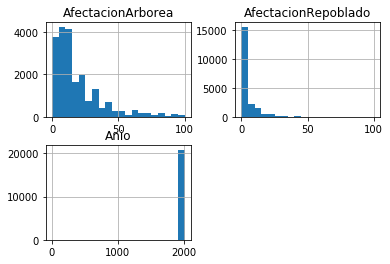

In [17]:
df_plagues.hist(bins=20)

In [13]:
#assuring each column is of the correct data type..
df_plagues.describe()

,Anio,AfectacionArborea,AfectacionRepoblado
count,20811.000000,20803.000000,20803.000000
mean,2011.479506,17.095082,3.247224
std,27.849021,18.365307,7.892514
min,5.000000,0.000000,0.000000
25%,2011.000000,5.000000,0.000000
50%,2012.000000,10.000000,0.000000
75%,2013.000000,20.000000,5.000000
max,2014.000000,100.000000,100.000000


In [ ]:
stats = df_plagues.describe().T
stats['unique'] = [len(df_plagues[column].unique()) for column in stats.index]
stats['null'] = [data[column].isnull().sum() for column in stats.index]
stats